# Digit Classification
### By: Mikayla Pugel

#### In this project I implement an image recognition system for classifying digits. I utilize both K-nearest neighbors and Naive Bayes machine linear models to complete this. This notebook is the different things I tried to improve the accuracy of the models. 
- KNN - supervised learning algorithm best for classification and regression. This algorithm uses the simple logic that things that or similar are close together. K refers to the number of nearest neighbors used to predict a data point. For example is k = 1, then the algorithm finds the 1 closest data point and label and predicts that the unknown data point is going to be that label as well. This is a very simple and easy to implement model however can become very slow with large datasets.
- NB - supervised classification algorithm based on Bayes Theorem. 
 - Bayes Theorem: P(X|Y) = P(Y|X)P(X)/P(Y)
 - P(X|Y) is the conditional probability that event X occurs , given that Y has occurred. This is also known as the posterior probability
 - P(A) : The prior probability of the response variable.
 - P(B) : The probability of training data or the evidence.
 - P(B|A) : This is known as the likelihood of the training data
 - Algorithm is considered "Naive" because we assume independence even though almost nothing is truly independent
 - Overall NB uses Use bayes rule to get the probability of the label, given the input

I begin below by loading in all the libraries I will need. 

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

#### The data comes from the an open data source on https://www.openml.org/d/554. For the sake of the project we were told that the data was clean and ready to be used. I currently have the randomizer turned off for sake of keeping my results the same and keeping my answers provided acurate. 

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]



data shape:  (70000, 784)
label shape: (70000,)


#### I start off by showing examples of the different digits. The digits are composed of a 28x28 matrix of digits, which come in the data set as a single row.

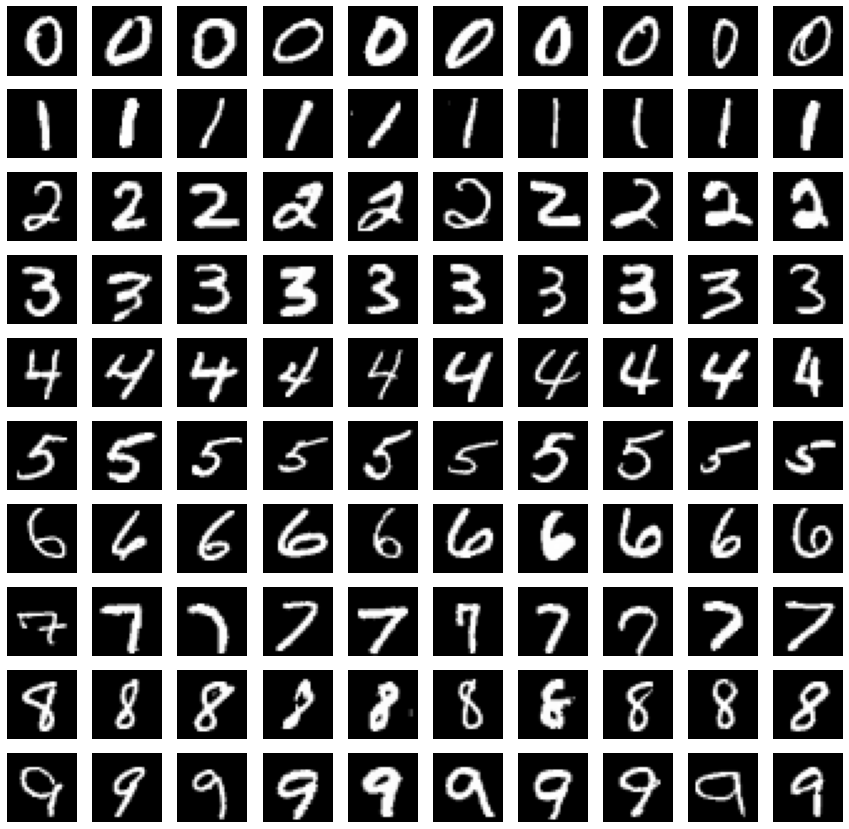

In [3]:
def P1(num_examples=10):

    #finds all the unique lables (0-9)
    num = np.unique(Y)

    #creates a plot of a number
    fig, axs = plt.subplots(len(num), num_examples, figsize = (15,15))

    #creates all the subplots with the correct image of the label 
    for i,d in enumerate(num):
        for j in range(num_examples):
            axs[i,j].imshow(X[Y==d][j].reshape((28,28)), cmap = "gray")
            axs[i,j].axis('off')



P1(10)

#### Below I train a simple K Nearest Neightbors Classifier using the mini data sets. I train on the train data and then predict on the development data and then print the report for how accurate the predictions are. 

#### The accuracy for each model stays very consistend no matter the k value used, however the precision for each digit fluctuates greatly. 

In [4]:
def P2(k_values):

    #creates a k nearest neighbor model for the range above and outputs report
    for i in k_values:
        model = KNeighborsClassifier(n_neighbors = i)
        model.fit(mini_train_data, mini_train_labels)
        predictions = model.predict(dev_data)
        print(classification_report(dev_labels, predictions))


k_values = [1, 3, 5, 7, 9]
P2(k_values)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       106
           1       0.82      0.98      0.90       118
           2       0.90      0.78      0.84       106
           3       0.89 

#### Below I train the model using different sizes of training data to see how the accuracy changes. This data is used in the next cell below for a linear regression. 

In [5]:
def P3(train_sizes, accuracies):

    from sklearn.metrics import accuracy_score

    for i in train_sizes:
        model = KNeighborsClassifier(n_neighbors = 1)
        model.fit(train_data[:i], train_labels[:i])
        start = time.time()
        predictions = model.predict(dev_data)
        stop = time.time()
        print(classification_report(dev_labels, predictions))
        duration = stop-start
        print("Time: " + str(duration) + " secs")
        accuracies += [accuracy_score(dev_labels, predictions)]
        print(accuracies)


train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       106
           1       0.70      0.99      0.82       118
           2       0.77      0.51      0.61       106
           3       0.72      0.68      0.70        97
           4       0.49      0.78      0.61        92
           5       0.81      0.72      0.76        88
           6       0.87      0.65      0.74       102
           7       0.69      0.89      0.78       102
           8       0.71      0.45      0.55        94
           9       0.67      0.40      0.50        95

    accuracy                           0.70      1000
   macro avg       0.72      0.69      0.69      1000
weighted avg       0.72      0.70      0.69      1000

Time: 0.13476157188415527 secs
[0.702]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       106
           1       0.78      0.99      0.87       118
           2       0.86      0.58      

#### From the data obtained above, I created a linear regression model to predict the models accuracy based on the training data size. I show a linear graph below first, and then transform the train data size in a logarithmic transform to better fit the model. The graphs are zoomed in for helping seeing the model. As the training sizes get really large for the prediction, the model goes pretty haywire. 

intercept [0.83491829]
coef [[6.68758138e-06]]
R^2: 0.4177006634161019


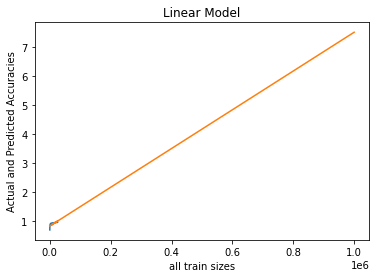

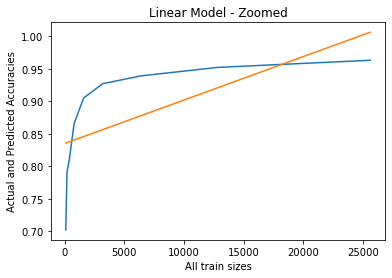

intercept [0.54576771]
coef [[0.04433883]]
R^2: 0.9068304252436642


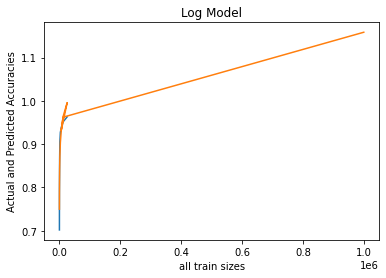

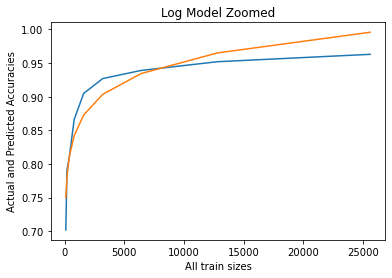

In [6]:
def P4():

    #linear regression x = train_sizes, y = accuracies
    #reshaping lists
    train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
    accuracies = [0.702, 0.791, 0.811, 0.866, 0.905, 0.927, 0.939, 0.952, 0.963]
    accuracies_pred = []

    train_sizes_reshaped = np.array(train_sizes).reshape(-1,1)
    accuracies_reshaped = np.array(accuracies).reshape(-1,1)

    #training linear regression
    lm = LinearRegression()
    lm.fit(train_sizes_reshaped, accuracies_reshaped)
    print('intercept', lm.intercept_)
    print('coef', lm.coef_)
    r_sq = lm.score(train_sizes_reshaped, accuracies_reshaped)
    print('R^2:', r_sq)

    #accuracies for training set sizes 6000,12000,1000000
    new_train_sizes = [6000,12000,1000000]

    all_train_sizes = train_sizes + new_train_sizes

    #calculting all new accuracies
    for i in all_train_sizes:
        y_pred = float(lm.intercept_ + lm.coef_ * i)
        accuracies_pred.append(y_pred)

    #plot
    fig, ax1 = plt.subplots()  
    ax1.plot(train_sizes, accuracies)
    ax1.plot(all_train_sizes, accuracies_pred)
    ax1.title.set_text('Linear Model')
    ax1.set_xlabel('all train sizes')
    ax1.set_ylabel('Actual and Predicted Accuracies')

    fig, ax2 = plt.subplots()
    ax2.plot(train_sizes[:9], accuracies[:9])
    ax2.plot(all_train_sizes[:9], accuracies_pred[:9]) 
    ax2.title.set_text('Linear Model - Zoomed')
    ax2.set_xlabel('All train sizes')
    ax2.set_ylabel('Actual and Predicted Accuracies')
    plt.show()

    #applying a transformation to the linear regression
    #multiple regressions were trained, however this one had the highest R^2
    lm2 = LinearRegression()
    lm2.fit(np.log(train_sizes_reshaped), accuracies_reshaped)
    print('intercept', lm2.intercept_)
    print('coef', lm2.coef_)
    r_sq2 = lm2.score(np.log(train_sizes_reshaped), accuracies_reshaped)
    print('R^2:', r_sq2)

    #calculating new accuracies based on 
    accuracies2 = []
    for i in all_train_sizes:
        y_pred2 = float(lm2.intercept_ + lm2.coef_*np.log(i))
        accuracies2.append(y_pred2)

    #plot
    fig, ax3 = plt.subplots()
    ax3.plot(train_sizes, accuracies) 
    ax3.plot(all_train_sizes, accuracies2) 
    ax3.title.set_text('Log Model')
    ax3.set_xlabel('all train sizes')
    ax3.set_ylabel('Actual and Predicted Accuracies')

    fig, ax4 = plt.subplots()
    ax4.plot(train_sizes[:9], accuracies[:9]) 
    ax4.plot(all_train_sizes[:9], accuracies2[:9])  
    ax4.title.set_text('Log Model Zoomed')
    ax4.set_xlabel('All train sizes')
    ax4.set_ylabel('Actual and Predicted Accuracies')
    plt.show()
    
P4()


#### Below I create a confusion matrix to see what values are most incorrectly predicted, I then printed the top confused value. So below you will see 11 fours that were confused at nines. 

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


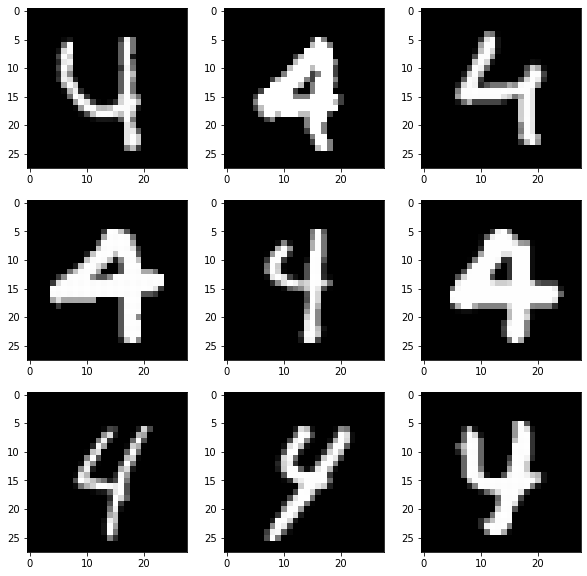

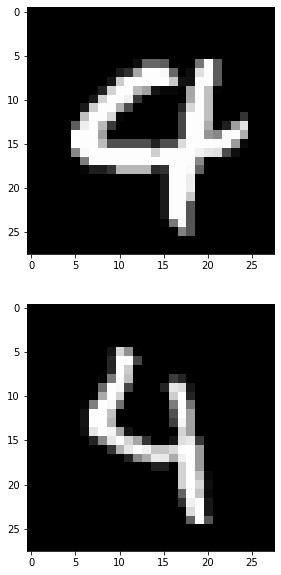

In [7]:
def P5():

    #train model and print confusion matrix
    model5_1 = KNeighborsClassifier(n_neighbors = 1)
    model5_1.fit(mini_train_data, mini_train_labels)
    predictions = model5_1.predict(dev_data)
    confusion_mat = confusion_matrix(dev_labels, predictions)
    print(confusion_matrix(dev_labels, predictions))

    #separate actual 4s
    dev_label_4s = list(np.where(dev_labels=='4'))

    #separate predited 9s
    predicted_9s = list(np.where(predictions=='9'))

    #find where they intersect and use their locations as misclasses 
    matches = np.intersect1d(dev_label_4s, predicted_9s)
    misclass = dev_data[matches,:]

    #plot all the actual 4s that were mistaken as 9s
    fig, axs = plt.subplots(3, 3, figsize=(10,10))

    k=0
    for i in range(3):
        for j in range(3):
            axs[i,j].imshow(misclass[k].reshape((28,28)), cmap='gray')
            k+=1

    fig1, axs1 = plt.subplots(2, 1, figsize=(10,10))
    axs1[0].imshow(misclass[9].reshape((28,28)), cmap='gray')
    axs1[1].imshow(misclass[10].reshape((28,28)), cmap='gray')

P5()

#### I decided next to create a function that blurs the pixels around it (a square so averaging of 9 pixels). And then train the models on the transform data. The first model is the non-blurred model and the last model has both the training and test data blurred. The accuracy 

In [8]:
def P6():

    # do not use a filter
    model1 = KNeighborsClassifier(n_neighbors = 1)
    model1.fit(mini_train_data, mini_train_labels)
    predictions1 = model1.predict(dev_data)
    print(classification_report(dev_labels, predictions1))

    #function for bluring pixels - m is columns, n is rows
    def blur_function(weight, original, blur):
        '''Function first blurs all the non-edges with the 3x3 pixels surrounding
        Function then blurs all the edge cases with 5 pixels surrounding
        Function then blurs the corner with the 3 pixels surrounding'''
        for z, y in zip(original, blur):
            y = y.reshape(28,28)
            z = z.reshape(28,28)
            (n,m) = ((28,28))
            #all pixels except the border
            for i in range(1,n-2):
                for j in range(1,m-2):
                    y[i,j] = (z[i,j] + weight * (z[i-1,j-1] + z[i-1,j] + z[i-1,j+1] +
                    z[i,j-1]+ z[i,j+1] + z[i+1,j-1] + z[i+1,j] + z[i+1,j+1])) /(1+8*weight)
            # top row
            for j in range(1,m-2):
                y[0,j] = (z[0,j] + weight * (z[0,j-1]+ z[0,j+1] +
                    z[1,j-1] + z[1,j] + z[1,j+1])) / (1+5*weight)
            # bottom row
            for j in range(1,m-2):
                y[n-1,j] = (z[n-1,j] + weight * (z[n-2,j-1] + z[n-2,j] + z[n-2,j+1] +
                            z[n-1,j-1]+ z[n-1,j+1])) / (1+5*weight)
            # first col
            for i in range(1,m-2):
                y[i,0] = (z[i,0] + weight * (z[i-1,0]+ z[i-1,1] +
                            z[i,1] + z[i+1,0] + z[i+1,1])) / (1+5*weight)
            # last col
            for i in range(1,m-2):
                y[i,m-1] = (z[i,m-1] + weight * (z[i-1,m-1]+ z[i-1,m-2] +
                            z[i,m-2] + z[i+1,m-1] + z[i+1,m-2])) / (1+5*weight)
            # corners
            y[0,0] = (z[0,0] + weight*(z[0,1] + z[1,0] + z[1,1])) / (1+3*weight)
            y[0,m-1] = (z[0,m-1] + weight*(z[0,m-2] + z[1,m-1] + z[1,m-2])) / (1+3*weight)
            y[n-1,0] = (z[n-1,0] + weight*(z[n-1,1] + z[n-2,0] + z[n-2,1])) / (1+3*weight)
            y[n-1,m-1] = (z[n-1,m-1] + weight*(z[n-1,m-2] + z[n-2,m-2] + z[n-2,m-1])) / (1+3*weight)
            y = y.reshape(784,)
        return blur

    #filter training data but not the dev data
    mini_train_filter = blur_function(1, mini_train_data, np.zeros(mini_train_data.shape))

    #an easier way to use GaussianBlur

    # for i in mini_train_data:
    #     image = i.reshape(28,28)
    # #     blur_image = cv2.GaussianBlur(image, (3,3), 0)
    #     blur_image = blur_image.reshape(784,)
    #     mini_train_filter += [blur_image]
    # #     cv2.imshow("Gaussian Smoothing", blur_image)
    # #     fig, axs = plt.subplots()
    # #     axs.imshow(blur_image)

    model2 = KNeighborsClassifier(n_neighbors = 1)
    model2.fit(mini_train_filter, mini_train_labels)
    predictions2 = model2.predict(dev_data)
    print(classification_report(dev_labels, predictions2))

    #filter the dev data but not the training data
    dev_data_filter = blur_function(1, dev_data, np.zeros(mini_train_data.shape))

    # for i in dev_data:
    #     image = i.reshape(28,28)
    #     blur_image = cv2.GaussianBlur(image, (3,3), 0)
    #     blur_image = blur_image.reshape(784,)
    #     dev_data_filter += [blur_image]
    #     cv2.imshow("Gaussian Smoothing", blur_image)
    #     fig, axs = plt.subplots()
    #     axs.imshow(blur_image)

    model3 = KNeighborsClassifier(n_neighbors = 1)
    model3.fit(mini_train_data, mini_train_labels)
    predictions3 = model3.predict(dev_data_filter)
    print(classification_report(dev_labels, predictions3))


    #filter both training and dev data
    model4 = KNeighborsClassifier(n_neighbors = 1)
    model4.fit(mini_train_filter, mini_train_labels)
    predictions4 = model4.predict(dev_data_filter)
    print(classification_report(dev_labels, predictions4))

P6()

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       106
           1       0.93      0.97      0.95       118
           2       0.93      0.86      0.89       106
           3       0.94 

#### I then tried binarizing the data. I first used a Naive Bayes Bernoulli model to binarize the data as a threshold of 0.1. The next model I used a multinomial Naive Bayes model and sepated the values into 3 different categories of 0,1,2. The models accuracies did not improve with this approach. 

In [9]:
def P7():

    model7 = BernoulliNB(binarize=0.1)
    model7.fit(mini_train_data, mini_train_labels)
    predictions7 = model7.predict(dev_data)
    print(accuracy_score(dev_labels, predictions7))

    new_train_data = np.ndarray(mini_train_data.shape)
    (n,m) = mini_train_data.shape
    for i in range(0,n):
        for j in range(0,m):
            if mini_train_data[i,j] <= 0.1:
                new_train_data[i,j] = 0
            elif mini_train_data[i,j] > 0.1 and mini_train_data[i,j] < 0.9:
                new_train_data[i,j] = 1
            elif mini_train_data[i,j] >= 0.9:
                new_train_data[i,j] = 2
            else:
                print("Out of range, check training data")

    new_dev_data = np.ndarray(dev_data.shape)
    (n,m) = dev_data.shape
    for i in range(0,n):
        for j in range(0,m):
            if dev_data[i,j] < 0.1:
                new_dev_data[i,j] = 0
            elif dev_data[i,j] >= 0.1 and dev_data[i,j] <= 0.9:
                new_dev_data[i,j] = 1
            elif dev_data[i,j] > 0.9:
                new_dev_data[i,j] = 2
            else:
                print("Out of range, check training data")

    model7_1 = MultinomialNB()
    model7_1.fit(new_train_data, mini_train_labels)
    predictions7_1 = model7_1.predict(new_dev_data)
    print(accuracy_score(dev_labels, predictions7_1))

P7()

0.814
0.807


#### I then also tried a Gaussian Naive Bayes model and added in a smoothing variable to help with the model, but still not improve it anymore than I had before. 

In [10]:
def P9():

    model9 = GaussianNB()
    model9.fit(mini_train_data, mini_train_labels)
    predictions9 = model9.predict(dev_data)
    print(accuracy_score(dev_labels, predictions9))


    model9_1 = GaussianNB(var_smoothing=0.06)
    model9_1.fit(mini_train_data, mini_train_labels )
    predictions9_1 = model9_1.predict(dev_data)
    print(accuracy_score(dev_labels, predictions9_1))

P9()

0.593
0.821


#### The next two cells are more just working on what understanding how well the models work on a deeper level. Below I create a binarized NB model and then used the probabilities of getting black or white to recreate digits. These recreated digits are shown below. 

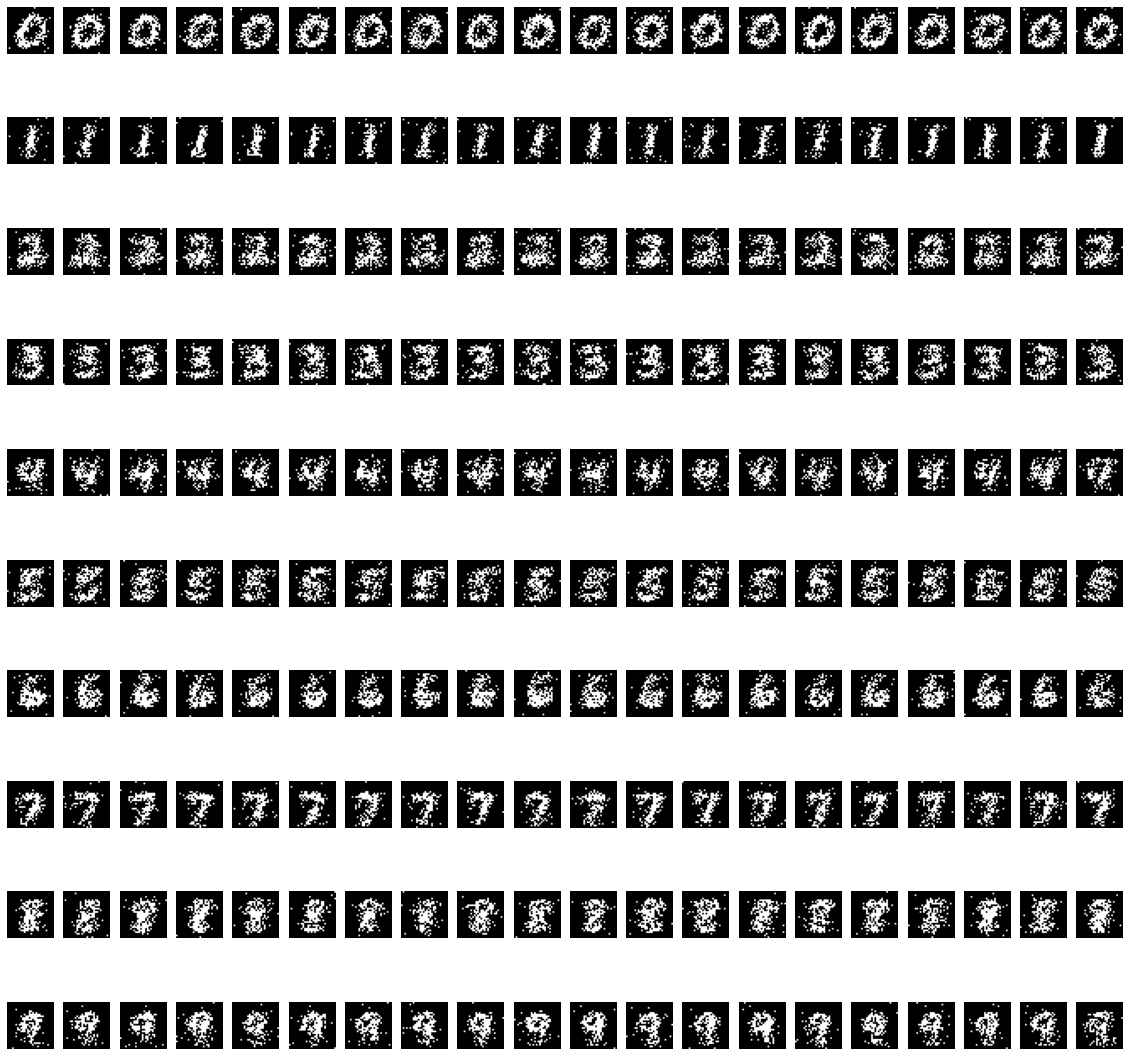

In [11]:
def P10(num_examples):

    #Bernoulli model with each pixel 0 or 1
    model10 = BernoulliNB(binarize=0.1)
    model10.fit(mini_train_data, mini_train_labels)

    #calculate probabilities of getting black for each digit
    probabilities = np.exp(model10.feature_log_prob_)

    #new array for digits
    #new array for digit labels
    new_digits = np.array([])
    num = [1,2,3,4,5,6,7,8,9,0]
    num_array = np.array([])

    #comparing probability with random number to create an array of 0,1s
    #iterating over 20 times in order to get 20 different examples for each digit
    z = 1
    while z < 21:    
        for i in probabilities:
            for j in i:
                random_number = np.random.rand()
                if j < random_number:
                    new_digits = np.append(new_digits, [0], axis=None)
                else:
                    new_digits = np.append(new_digits, [1], axis=None)
        num_array = np.append(num_array, num)
        z += 1
    new_digits = new_digits.reshape(200,784)

    #printing new digits - num_array is rows of 10 digits and new_digits is the 
    #0,1 based on prediction and random numbers
    fig, axs = plt.subplots(len(num), num_examples, figsize=(20,20))
    for i,d in enumerate(num):
        for j in range(num_examples):
            axs[i,j].imshow(new_digits[num_array==d][j].reshape((28,28)), cmap = 'gray')
            axs[i,j].axis('off')

P10(20)

#### In this section I wanted to see if we bucketed the predictions, would they actually have an accuracy of the prediction. This is important to look at because if your models prediciton for something is 90% and then the models actual accuracy is 60%, then your model is not accuractly making predictions. The buckets and results are shown below.  

In [12]:
def P11(buckets, correct, total):
    
    #create model
    model11 = BernoulliNB(binarize=0, alpha=0.06)
    model11.fit(mini_train_data, mini_train_labels)
    
    #create array with predicted probabilities of each number
    predict_probs = model11.predict_proba(dev_data)
    
    #1000 data points for each digit
#     print(predict_probs.shape)
#     print(dev_labels.shape)

    #iterates through the buckets
    for x in range(len(buckets)):

        #interates through each row
        for y in range(1000):
            
            #this if statement is needed to get range of bucket 0-0.5
            if x == 0:
                #compares each max posterior probability and places it in the correct bucket
                if 0 <= np.max(predict_probs[y]) <= buckets[x]:
                    total[x] += 1

                    #finds the digit corresponding to the maximum posterior probability and checks it against the labels
                    if int(np.argmax(predict_probs[y])) == int(dev_labels[y]):
                        correct[x] += 1
            elif x != 0:
                #compares each max posterior probability and places it in the correct bucket
                if buckets[x-1] < np.max(predict_probs[y]) <= buckets[x]:
                    total[x] += 1

                    #finds the digit corresponding to the maximum posterior probability and checks it against the labels
                    if int(np.argmax(predict_probs[y])) == int(dev_labels[y]):
                        correct[x] += 1
            

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  34    accuracy = 0.412
p(pred) is 0.9000000000000 to 0.9990000000000    total =  71    accuracy = 0.451
p(pred) is 0.9990000000000 to 0.9999900000000    total =  57    accuracy = 0.509
p(pred) is 0.9999900000000 to 0.9999999000000    total =  54    accuracy = 0.630
p(pred) is 0.9999999000000 to 0.9999999990000    total =  54    accuracy = 0.741
p(pred) is 0.9999999990000 to 0.9999999999900    total =  36    accuracy = 0.778
p(pred) is 0.9999999999900 to 0.9999999999999    total =  46    accuracy = 0.826
p(pred) is 0.9999999999999 to 1.0000000000000    total = 648    accuracy = 0.941
